In [ ]:
pip install sastrawi

     |████████████████████████████████| 209 kB 14.3 MB/s 


In [ ]:
#import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity
import string
import re
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.tokenize import word_tokenize



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
#import dataset
import pandas as pd

from google.colab import drive

drive.mount('/content/drive')



Mounted at /content/drive


In [ ]:
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [ ]:
!ls "/content/drive/My Drive"


'1103174045 Registrasi _ Telkom University.pdf'
'1103174045 Registrasi _ Telkom University.PDF'
'1103174045_Tinton Aji Sadewo.pdf'
'36833_Kisi - Kisi UTS Jarkomdat 2.docx'
'36833_Kisi - Kisi UTS Jarkomdat 2.pdf'
'Aplikasi Lengkap Kls 5 Smt II.xlsm'
'Bagi 127342-ID-aplikasi-sistem-pendukung-keputusan-pemb.pdf'
 Bali
 Bella
'biomedis uas'
'BISMILLAH TAAAAAAAA '
'bromo ha e ha e'
'Bu Darmi Admin KL 5 2019-2020'
 Classroom
'Colab Notebooks'
 Foto
'Getting started.pdf'
 hmtk
'Ikemas Juara'
 imoed
 JURNAL
 ktm.pdf
'Mesin learning'
 pilihan
 poltekim
'PRE ORDER JERSEY GLOTROOPERS 2019 (Tanggapan).xlsx'
 Proposal
'Reza jalan-jalan'
 Screenshot_20210219-104736_Zoom.jpg
 Screenshot_20210226-090844_Zoom.jpg
 Screenshot_20210319-095646_Zoom.jpg
 Screenshot_20210427-060357_BRImo.jpg
 Screenshot_20210507-132720_BRImo.jpg
'Screenshot_20210629-205635_BRImo (1).jpg'
 Screenshot_20210629-205635_BRImo.jpg
'Screenshot (36).png'
'Screenshot (48).png'
'Screenshot (49).png'
'smt 6'
'Smt 7'
 syarat
 TA
 tak
'

In [ ]:
!ls "/content/drive/My Drive/Colab Notebooks"

'ahc fiks'		       'Hasil Netral'
'AHC FIKS.ipynb'	       'Hasil Positif'
 baru.csv		       'negatif 100 data.csv'
'baru saja.csv'		        negatif1.csv
'baru saja.gsheet'	        negatif2.csv
'coba ahc3.csv'		        negatif3.csv
'coba dokumen (1).gsheet'      'negatif 4 cluster.csv'
'coba dokumen.csv'	       'negatif 5 cluster.csv'
'coba dokumen.gsheet'	        negatif.csv
 data.csv		        netral.csv
 data.gsheet		        positif.csv
 Develope.ipynb		       'positif token.csv'
'Ekstraksi Fitur NAIVE.ipynb'   STEMMING.ipynb
 Hasil			        tfidfNegatif.csv
'Hasil Negatif'		        Untitled0.ipynb


In [ ]:
df =pd.read_csv('/content/drive/My Drive/Colab Notebooks/data.csv', delimiter=';')

df.head(2000)

,Text,Sentiment,Kesesuaian
0,kenaikan bpjs kesehatan munculkan empat puluh ...,Netral,NaN
1,rumah sakit mitra bpjs kesehatan di padang ter...,Netral,NaN
2,orang menolak bpjs krn lebih prefer asuransi s...,Netral,NaN
3,bayar bpjs aja ga sanggup siapa juga yang mau ...,Negatif,NaN
4,salam sehat ibu husna selama masa covid pelaya...,Netral,NaN
...,...,...,...
1995,ga sanggup munduur itu perintah konstitusi jok...,Negatif,NaN
1996,pale lu peduli sesama lu sama circle lu aja ka...,Negatif,NaN
1997,ra mashok ngerti ra mengatasnamakan negara pad...,Negatif,NaN
1998,pemalakan itu yg hanya kalian yg merasa tpi by...,Negatif,NaN


In [ ]:
#pengecekan nilai null pada dataset
df.isnull().sum().sort_values(ascending=False).head()

Kesesuaian    2051
Sentiment        0
Text             0
dtype: int64

In [ ]:
# menghapus kesesuaian
df.drop('Kesesuaian', axis=1, inplace=True)
df.isnull().sum().sort_values(ascending=False).head()

Sentiment    0
Text         0
dtype: int64

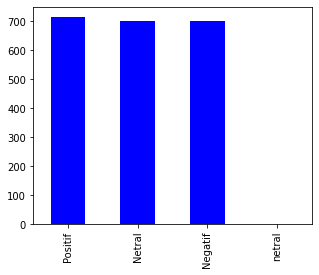

In [ ]:
df['Sentiment'].value_counts().plot.bar(color = 'blue', figsize = (5, 4))

In [ ]:
df['Sentiment'].value_counts()



Positif    714
Netral     702
Negatif    700
netral       1
Name: Sentiment, dtype: int64

In [ ]:
df.head(5)


,Text,Sentiment
0,kenaikan bpjs kesehatan munculkan empat puluh ...,Netral
1,rumah sakit mitra bpjs kesehatan di padang ter...,Netral
2,orang menolak bpjs krn lebih prefer asuransi s...,Netral
3,bayar bpjs aja ga sanggup siapa juga yang mau ...,Negatif
4,salam sehat ibu husna selama masa covid pelaya...,Netral


In [ ]:
# preprocessing
print('Dataset Size : ',df.shape)
print('Columns are : ', df.columns)

Dataset Size :  (2117, 2)
Columns are :  Index(['Text', 'Sentiment'], dtype='object')


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2117 entries, 0 to 2116
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Text       2117 non-null   object
 1   Sentiment  2117 non-null   object
dtypes: object(2)
memory usage: 33.2+ KB


In [ ]:
#STOP REMOVAL

stopword = nltk.corpus.stopwords.words('indonesian')

more_stopword = [ 'min','dan','tapi','kang','dong','utk','gw','gue','ye','oke',
                'hai','tweps','tweeps','yg','dg','halah','dgn','hufttttt','aw','tae',
                 'tai','bro','haha','dll','gengs','tuh','yeaayy','met','ohalowww',
                 'halo','gaes','donk','ohhh','mun','heh','tp','rp','ud','byk',
                 'serta','ya','gak','ga','aja','nya','udah','kalo','slur',
                 'untuk',
                       ]
stopword = stopword + more_stopword

def remove_stopwords (Text):
    Text = [word for word in Text.split(" ") if not word in stopword]     # proses stop word
    Text = " ".join(Text)
    Text.strip()
    return Text
df['STOP_REMOVAL']= df['Text'].apply(lambda x: remove_stopwords (x))
df.head(10)

,Text,Sentiment,STOP_REMOVAL
0,kenaikan bpjs kesehatan munculkan empat puluh ...,Netral,kenaikan bpjs kesehatan munculkan puluh delapa...
1,rumah sakit mitra bpjs kesehatan di padang ter...,Netral,rumah sakit mitra bpjs kesehatan padang terapk...
2,orang menolak bpjs krn lebih prefer asuransi s...,Netral,orang menolak bpjs krn prefer asuransi swasta ...
3,bayar bpjs aja ga sanggup siapa juga yang mau ...,Negatif,bayar bpjs sanggup percaya uang gaib triliun p...
4,salam sehat ibu husna selama masa covid pelaya...,Netral,salam sehat husna covid pelayanan kantor caban...
5,presiden sby sampai bpjs kesehatan tinta emas ...,netral,presiden sby bpjs kesehatan tinta emas perjala...
6,pendidikan gratis nyatanya tidak Kesehatan gra...,Negatif,pendidikan gratis Kesehatan gratis bpjs iurann...
7,iya kang udah wajib walau udah ikut bayar laya...,Negatif,iya wajib bayar layanan kesehatan bpjs kesehat...
8,jangan malas membaca ya,Netral,malas membaca
9,urusan rokok tolong jangan bawa kerugian negar...,Netral,urusan rokok tolong bawa kerugian negara deh b...


In [ ]:
df['Text']= df['STOP_REMOVAL'].str.lower()

df.head(10)

,Text,Sentiment,STOP_REMOVAL
0,kenaikan bpjs kesehatan munculkan puluh delapa...,Netral,kenaikan bpjs kesehatan munculkan puluh delapa...
1,rumah sakit mitra bpjs kesehatan padang terapk...,Netral,rumah sakit mitra bpjs kesehatan padang terapk...
2,orang menolak bpjs krn prefer asuransi swasta ...,Netral,orang menolak bpjs krn prefer asuransi swasta ...
3,bayar bpjs sanggup percaya uang gaib triliun p...,Negatif,bayar bpjs sanggup percaya uang gaib triliun p...
4,salam sehat husna covid pelayanan kantor caban...,Netral,salam sehat husna covid pelayanan kantor caban...
5,presiden sby bpjs kesehatan tinta emas perjala...,netral,presiden sby bpjs kesehatan tinta emas perjala...
6,pendidikan gratis kesehatan gratis bpjs iurann...,Negatif,pendidikan gratis Kesehatan gratis bpjs iurann...
7,iya wajib bayar layanan kesehatan bpjs kesehat...,Negatif,iya wajib bayar layanan kesehatan bpjs kesehat...
8,malas membaca,Netral,malas membaca
9,urusan rokok tolong bawa kerugian negara deh b...,Netral,urusan rokok tolong bawa kerugian negara deh b...


In [ ]:
#STEMMING

def stemmingIndo(Text):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    return stemmer.stem(Text)

df['STEMMING'] = df['STOP_REMOVAL'].apply(lambda x: stemmingIndo(x))
df.head(10)

,Text,Sentiment,STOP_REMOVAL,STEMMING
0,kenaikan bpjs kesehatan munculkan puluh delapa...,Netral,kenaikan bpjs kesehatan munculkan puluh delapa...,naik bpjs sehat muncul puluh delapan persen se...
1,rumah sakit mitra bpjs kesehatan padang terapk...,Netral,rumah sakit mitra bpjs kesehatan padang terapk...,rumah sakit mitra bpjs sehat padang terap antr...
2,orang menolak bpjs krn prefer asuransi swasta ...,Netral,orang menolak bpjs krn prefer asuransi swasta ...,orang tolak bpjs krn prefer asuransi swasta si...
3,bayar bpjs sanggup percaya uang gaib triliun p...,Negatif,bayar bpjs sanggup percaya uang gaib triliun p...,bayar bpjs sanggup percaya uang gaib triliun p...
4,salam sehat husna covid pelayanan kantor caban...,Netral,salam sehat husna covid pelayanan kantor caban...,salam sehat husna covid layan kantor cabang bp...
5,presiden sby bpjs kesehatan tinta emas perjala...,netral,presiden sby bpjs kesehatan tinta emas perjala...,presiden sby bpjs sehat tinta emas jalan bangsa
6,pendidikan gratis kesehatan gratis bpjs iurann...,Negatif,pendidikan gratis Kesehatan gratis bpjs iurann...,didik gratis sehat gratis bpjs iur nunggak lis...
7,iya wajib bayar layanan kesehatan bpjs kesehat...,Negatif,iya wajib bayar layanan kesehatan bpjs kesehat...,iya wajib bayar layan sehat bpjs sehat usaha w...
8,malas membaca,Netral,malas membaca,malas baca
9,urusan rokok tolong bawa kerugian negara deh b...,Netral,urusan rokok tolong bawa kerugian negara deh b...,urus rokok tolong bawa rugi negara deh bawa ar...


In [ ]:
df['Data_Text'] = df['STEMMING']
df.head()

,Text,Sentiment,STOP_REMOVAL,STEMMING,Data_Text
0,kenaikan bpjs kesehatan munculkan puluh delapa...,Netral,kenaikan bpjs kesehatan munculkan puluh delapa...,naik bpjs sehat muncul puluh delapan persen se...,naik bpjs sehat muncul puluh delapan persen se...
1,rumah sakit mitra bpjs kesehatan padang terapk...,Netral,rumah sakit mitra bpjs kesehatan padang terapk...,rumah sakit mitra bpjs sehat padang terap antr...,rumah sakit mitra bpjs sehat padang terap antr...
2,orang menolak bpjs krn prefer asuransi swasta ...,Netral,orang menolak bpjs krn prefer asuransi swasta ...,orang tolak bpjs krn prefer asuransi swasta si...,orang tolak bpjs krn prefer asuransi swasta si...
3,bayar bpjs sanggup percaya uang gaib triliun p...,Negatif,bayar bpjs sanggup percaya uang gaib triliun p...,bayar bpjs sanggup percaya uang gaib triliun p...,bayar bpjs sanggup percaya uang gaib triliun p...
4,salam sehat husna covid pelayanan kantor caban...,Netral,salam sehat husna covid pelayanan kantor caban...,salam sehat husna covid layan kantor cabang bp...,salam sehat husna covid layan kantor cabang bp...


In [ ]:
df.isna().sum()

Text            0
Sentiment       0
STOP_REMOVAL    0
STEMMING        0
Data_Text       0
dtype: int64

In [ ]:
from nltk.tokenize import word_tokenize
df['TOKENIZING'] = df['STEMMING'].apply(lambda x: word_tokenize(x))
df.head(10)

,Text,Sentiment,STOP_REMOVAL,STEMMING,Data_Text,TOKENIZING
0,kenaikan bpjs kesehatan munculkan puluh delapa...,Netral,kenaikan bpjs kesehatan munculkan puluh delapa...,naik bpjs sehat muncul puluh delapan persen se...,naik bpjs sehat muncul puluh delapan persen se...,"[naik, bpjs, sehat, muncul, puluh, delapan, pe..."
1,rumah sakit mitra bpjs kesehatan padang terapk...,Netral,rumah sakit mitra bpjs kesehatan padang terapk...,rumah sakit mitra bpjs sehat padang terap antr...,rumah sakit mitra bpjs sehat padang terap antr...,"[rumah, sakit, mitra, bpjs, sehat, padang, ter..."
2,orang menolak bpjs krn prefer asuransi swasta ...,Netral,orang menolak bpjs krn prefer asuransi swasta ...,orang tolak bpjs krn prefer asuransi swasta si...,orang tolak bpjs krn prefer asuransi swasta si...,"[orang, tolak, bpjs, krn, prefer, asuransi, sw..."
3,bayar bpjs sanggup percaya uang gaib triliun p...,Negatif,bayar bpjs sanggup percaya uang gaib triliun p...,bayar bpjs sanggup percaya uang gaib triliun p...,bayar bpjs sanggup percaya uang gaib triliun p...,"[bayar, bpjs, sanggup, percaya, uang, gaib, tr..."
4,salam sehat husna covid pelayanan kantor caban...,Netral,salam sehat husna covid pelayanan kantor caban...,salam sehat husna covid layan kantor cabang bp...,salam sehat husna covid layan kantor cabang bp...,"[salam, sehat, husna, covid, layan, kantor, ca..."
5,presiden sby bpjs kesehatan tinta emas perjala...,netral,presiden sby bpjs kesehatan tinta emas perjala...,presiden sby bpjs sehat tinta emas jalan bangsa,presiden sby bpjs sehat tinta emas jalan bangsa,"[presiden, sby, bpjs, sehat, tinta, emas, jala..."
6,pendidikan gratis kesehatan gratis bpjs iurann...,Negatif,pendidikan gratis Kesehatan gratis bpjs iurann...,didik gratis sehat gratis bpjs iur nunggak lis...,didik gratis sehat gratis bpjs iur nunggak lis...,"[didik, gratis, sehat, gratis, bpjs, iur, nung..."
7,iya wajib bayar layanan kesehatan bpjs kesehat...,Negatif,iya wajib bayar layanan kesehatan bpjs kesehat...,iya wajib bayar layan sehat bpjs sehat usaha w...,iya wajib bayar layan sehat bpjs sehat usaha w...,"[iya, wajib, bayar, layan, sehat, bpjs, sehat,..."
8,malas membaca,Netral,malas membaca,malas baca,malas baca,"[malas, baca]"
9,urusan rokok tolong bawa kerugian negara deh b...,Netral,urusan rokok tolong bawa kerugian negara deh b...,urus rokok tolong bawa rugi negara deh bawa ar...,urus rokok tolong bawa rugi negara deh bawa ar...,"[urus, rokok, tolong, bawa, rugi, negara, deh,..."


In [ ]:
df['Text_Token'] = df['TOKENIZING']
df.head()

,Text,Sentiment,STOP_REMOVAL,STEMMING,Data_Text,TOKENIZING,Text_Token
0,kenaikan bpjs kesehatan munculkan puluh delapa...,Netral,kenaikan bpjs kesehatan munculkan puluh delapa...,naik bpjs sehat muncul puluh delapan persen se...,naik bpjs sehat muncul puluh delapan persen se...,"[naik, bpjs, sehat, muncul, puluh, delapan, pe...","[naik, bpjs, sehat, muncul, puluh, delapan, pe..."
1,rumah sakit mitra bpjs kesehatan padang terapk...,Netral,rumah sakit mitra bpjs kesehatan padang terapk...,rumah sakit mitra bpjs sehat padang terap antr...,rumah sakit mitra bpjs sehat padang terap antr...,"[rumah, sakit, mitra, bpjs, sehat, padang, ter...","[rumah, sakit, mitra, bpjs, sehat, padang, ter..."
2,orang menolak bpjs krn prefer asuransi swasta ...,Netral,orang menolak bpjs krn prefer asuransi swasta ...,orang tolak bpjs krn prefer asuransi swasta si...,orang tolak bpjs krn prefer asuransi swasta si...,"[orang, tolak, bpjs, krn, prefer, asuransi, sw...","[orang, tolak, bpjs, krn, prefer, asuransi, sw..."
3,bayar bpjs sanggup percaya uang gaib triliun p...,Negatif,bayar bpjs sanggup percaya uang gaib triliun p...,bayar bpjs sanggup percaya uang gaib triliun p...,bayar bpjs sanggup percaya uang gaib triliun p...,"[bayar, bpjs, sanggup, percaya, uang, gaib, tr...","[bayar, bpjs, sanggup, percaya, uang, gaib, tr..."
4,salam sehat husna covid pelayanan kantor caban...,Netral,salam sehat husna covid pelayanan kantor caban...,salam sehat husna covid layan kantor cabang bp...,salam sehat husna covid layan kantor cabang bp...,"[salam, sehat, husna, covid, layan, kantor, ca...","[salam, sehat, husna, covid, layan, kantor, ca..."


In [ ]:
df.to_csv(r'drive/My Drive/Colab Notebooks/baru saja banget.csv',columns=["STOP_REMOVAL","STEMMING","Text_Token","Sentiment"])